In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sn

#Scalers
from sklearn.preprocessing import StandardScaler

In [2]:
# loading the data
df = pd.read_csv('train.csv')

In [3]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
df.shape

(26729, 10)

In [5]:
# drop outcomesubtype - not relevant for model, teh same as Name, DateTIme
# df = df.drop(['OutcomeSubtype'], axis=1)

# PLOTS

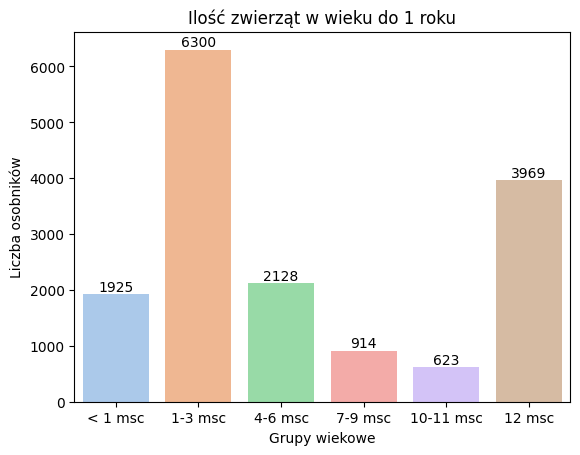

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

age_groups = ['< 1 msc', '1-3 msc', '4-6 msc', '7-9 msc', '10-11 msc', '12 msc']
count = [1925, 6300, 2128, 914, 623, 3969]

# Wykres słupkowy
sns.barplot(x=age_groups, y=count, palette='pastel')

# Dodanie etykiet nad słupkami
for i in range(len(count)):
    plt.text(i, count[i], str(count[i]), ha='center', va='bottom')

# Dodanie opisów osi i tytułu
plt.xlabel('Grupy wiekowe')
plt.ylabel('Liczba osobników')
plt.title('Ilość zwierząt w wieku do 1 roku')

# Pokazanie wykresu
plt.show()

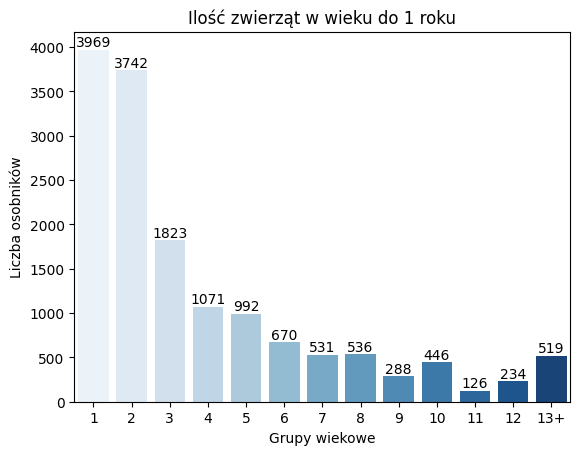

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

age_groups = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13+']
count = [3969, 3742, 1823, 1071, 992, 670, 531, 536, 288, 446, 126, 234, 519]

# Wykres słupkowy
sns.barplot(x=age_groups, y=count, palette='Blues')

# Dodanie etykiet nad słupkami
for i in range(len(count)):
    plt.text(i, count[i], str(count[i]), ha='center', va='bottom')

# Dodanie opisów osi i tytułu
plt.xlabel('Grupy wiekowe')
plt.ylabel('Liczba osobników')
plt.title('Ilość zwierząt w wieku do 1 roku')

# Pokazanie wykresu
plt.show()

Struktura wiekowa zwierząt: poniżej 1 msc: 1925 1-3 msc: 6300 4-6 msc: 2128 7-9 msc: 914 10-12 msc: 5128

In [8]:
df['AnimalType'].value_counts()
percent_AnimalType = df['AnimalType'].value_counts() / len(df) * 100
percent_AnimalType

Dog    58.344869
Cat    41.655131
Name: AnimalType, dtype: float64

[]

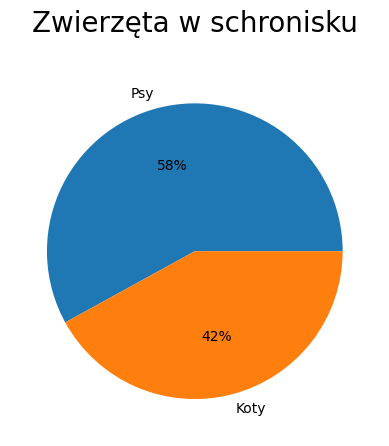

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

labels = 'Psy', 'Koty'
sizes = [58, 42]

fig, ax = plt.subplots()
ax.pie(sizes,
      labels=labels,
      autopct='%1.0f%%')

plt.title('Zwierzęta w schronisku', pad=25, fontsize=20)

plt.plot()

In [10]:
df['OutcomeType'].value_counts()
percent_OutcomeType = df['OutcomeType'].value_counts() / len(df) * 100
percent_OutcomeType

Adoption           40.289573
Transfer           35.250103
Return_to_owner    17.905646
Euthanasia          5.817651
Died                0.737027
Name: OutcomeType, dtype: float64

[]

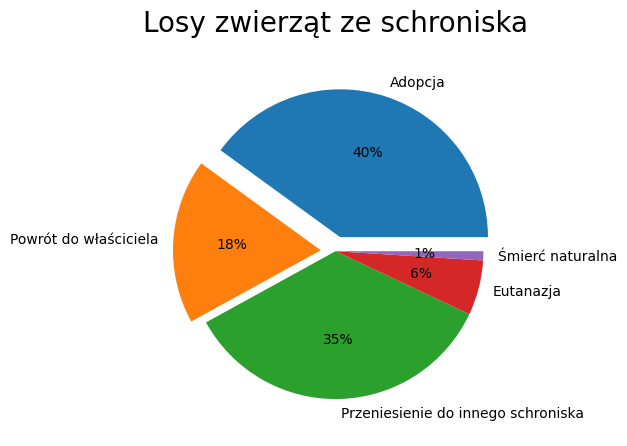

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

labels = 'Adopcja', 'Powrót do właściciela', 'Przeniesienie do innego schroniska', 'Eutanazja', 'Śmierć naturalna'
sizes = [40, 18, 35, 6, 1]
explode = (0.1, 0.1, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes,
      labels=labels,
      explode=explode,
      autopct='%1.0f%%')

plt.title('Losy zwierząt ze schroniska', pad=25, fontsize=20)

plt.plot()

# DATA CLEANING

## Missing Data



In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent * 100], axis=1, keys=['Total', 'Percent(%)'])
missing_data.head(10)

,Total,Percent(%)
OutcomeSubtype,13612,50.925961
Name,7691,28.773991
AgeuponOutcome,18,0.067343
SexuponOutcome,1,0.003741
AnimalID,0,0.000000
DateTime,0,0.000000
OutcomeType,0,0.000000
AnimalType,0,0.000000
Breed,0,0.000000
Color,0,0.000000


In [13]:
df = df.loc[df['AgeuponOutcome'].notnull()]
df = df.loc[df['SexuponOutcome'].notnull()]

## AnimalType

In [14]:
df['AnimalType'] = df['AnimalType'].replace({'Dog': 0, 'Cat': 1})

## SexuponOutcome

In [15]:
temp = pd.get_dummies(df['SexuponOutcome'])
df = pd.concat([df, temp], axis=1)
df.drop("SexuponOutcome", axis=1, inplace=True)
df = df.rename(columns={'Unknown': 'Unknown Sex'})

## AgeuponOutcome

In [16]:
age_dict = {'1 year':12, '2 years':24, '3 weeks':0.75, '1 month':1, '5 months':5, '4 years':48,
       '3 months':3, '2 weeks':0.5, '2 months':2, '10 months':10, '6 months':6,
       '5 years':60, '7 years':84, '3 years':36, '4 months':4, '12 years':144, '9 years':108,
       '6 years':72, '1 weeks':0.25, '11 years':132, '4 weeks':1, '7 months':7, '8 years':12,
       '11 months':11, '4 days':0, '9 months':9, '8 months':8, '15 years':180,
       '10 years':120, '1 week':0.25, '0 years':0, '14 years':168, '3 days':0, '6 days':0,
       '5 days':0, '5 weeks':1.25, '2 days':0, '16 years':192, '1 day':0, '13 years':156,
       '17 years':204, '18 years':216, '19 years':228, '20 years':240}

df['AgeuponOutcome'] = df['AgeuponOutcome'].map(age_dict)

## Breed

In [17]:
# utworzenie nowej kolumny MixOrNot- przypisanie dla Mix wartości 0, pozostałe - 1
df['MixOrNot'] = df['Breed'].apply(lambda x: 0 if 'Mix' in x else 1)

## Color

In [18]:
unique_colors = df['Color'].unique()
df['Color'].sum()
df['numberOfColor'] = df['Color'].str.count('/') + 1

## Dropping

In [19]:
df = df.drop(['Name'], axis=1)
df = df.drop(['OutcomeSubtype'], axis=1)
df = df.drop(['DateTime'], axis=1)
df = df.drop(['Breed'], axis=1)
#df = df.drop(['Color'], axis=1)

## Data after cleaning


In [20]:
df.head()

,AnimalID,OutcomeType,AnimalType,AgeuponOutcome,Color,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown Sex,MixOrNot,numberOfColor
0,A671945,Return_to_owner,0,12.00,Brown/White,0,0,1,0,0,0,2
1,A656520,Euthanasia,1,12.00,Cream Tabby,0,0,0,1,0,0,1
2,A686464,Adoption,0,24.00,Blue/White,0,0,1,0,0,0,2
3,A683430,Transfer,1,0.75,Blue Cream,0,1,0,0,0,0,1
4,A667013,Transfer,0,24.00,Tan,0,0,1,0,0,1,1


In [21]:
df['OutcomeType'].value_counts()

Adoption           10769
Transfer            9406
Return_to_owner     4785
Euthanasia          1553
Died                 197
Name: OutcomeType, dtype: int64

In [22]:
from scipy.stats import chi2_contingency
# Przykładowe dane
cecha1 = df['Color']
cecha2 = df['OutcomeType']

# Tworzenie tablicy kontyngencji (cross-tabulation)
tablica = pd.crosstab(cecha1, cecha2)

# Przeprowadzenie testu chi-kwadrat
statystyka, p_value, _, _ = chi2_contingency(tablica)

# Wyświetlenie wyników
print("Statystyka testowa:", statystyka)
print("Wartość p:", p_value)

Statystyka testowa: 3926.1844089353926
Wartość p: 1.0885513390980872e-224


# Value we are looking for.. y

In [23]:
df['OutcomeType'] = df['OutcomeType'].replace({'Euthanasia': 0,'Transfer': 0,'Return_to_owner': 0,'Died': 0, 'Adoption': 1})
# Adpoted = 1
# Not adopted = 0

In [24]:
df = df.rename(columns={'OutcomeType': 'Adpoted'})

In [25]:
df.head()

,AnimalID,Adpoted,AnimalType,AgeuponOutcome,Color,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown Sex,MixOrNot,numberOfColor
0,A671945,0,0,12.00,Brown/White,0,0,1,0,0,0,2
1,A656520,0,1,12.00,Cream Tabby,0,0,0,1,0,0,1
2,A686464,1,0,24.00,Blue/White,0,0,1,0,0,0,2
3,A683430,0,1,0.75,Blue Cream,0,1,0,0,0,0,1
4,A667013,0,0,24.00,Tan,0,0,1,0,0,1,1


# REGRESJA LOGISTYCZNA

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [27]:
X = df[['AnimalType', 'AgeuponOutcome','Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown Sex', 'MixOrNot', 'numberOfColor']]
y = df['Adpoted']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression, LogisticRegression

rl = LogisticRegression(solver='lbfgs', max_iter=1000)
rl.fit(X_train, y_train)

y_pred = rl.predict(X_test)

# Lub jeśli chcemy otrzymać prawdopodobieństwa:
y_pred_rl = rl.predict_proba(X_test)

In [30]:
## Regresja lasso:
rlr = LogisticRegression(C=0.01, solver = 'liblinear', penalty='l1')
rlr.fit(X_train, y_train)
y_pred_lasso = rlr.predict(X_test)

## Regresja grzbietowa:
rlr = LogisticRegression(random_state=30, solver = 'liblinear', penalty = 'l2', C = 0.5)
rlr.fit(X_train, y_train)
y_pred_grz = rlr.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score

In [32]:
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_lasso).ravel()

In [33]:
print(f'TP:{tp}, TN:{tn}')
print(f'Ile obserwacji zaklasyfikowaliśmy poprawnie: {tp+tn}')
print(f'FP:{fp}, FN:{fn}')
print(f'Ile obserwacji zaklasyfikowaliśmy niepoprawnie: {fp+fn}')

TP:2188, TN:1007
Ile obserwacji zaklasyfikowaliśmy poprawnie: 3195
FP:391, FN:1756
Ile obserwacji zaklasyfikowaliśmy niepoprawnie: 2147


In [34]:
recall_score(y_test, y_pred_lasso) # better closer to 1

0.8178854215183977

In [35]:
precision_score(y_test, y_pred_lasso)  # im mniejsza precyzja tym więcej False Positives

0.6355410785378212

In [36]:
f1_score(y_test, y_pred_lasso)  # im wyższy F1 Score tym lepszy model

0.715274949083503

# DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [42]:
print("Dokładność predykcji:", accuracy)

Dokładność predykcji: 0.7577686259827779


In [43]:
feat_importance=model.tree_.compute_feature_importances(normalize=False)   #najważniejsze znaczenie ma "AgeuponOutcome','Intact Female', 'Intact Male"
feat_importance

array([0.00424642, 0.04982917, 0.04828992, 0.03926549, 0.00130646,
       0.00076573, 0.04044797, 0.00231836, 0.00215506])